# Klasifikace objektů
Cvičení je zaměřené na jednotlivé metody klasifikace objektů od jednodušších pomocí popisných tvarových charakteristik až po sofostikované neuronové sítě.

## Tvarové charakteristiky
Tvarové charakteristiky se využívají hlavně proto, že jsou nezávislé na rozměrech objektů. Vždy se jedná o poměry nějakých měřených charakteristik objektu (např. délka, obvod, obsah, atd...). 

Takových tvarových charakteristik si na cvičení vyzkoušíme 7 (to nejsou všechny, které existují). Některé jsou dostupné z RUSS, John C a F. Brent NEAL. *The image processing handbook*. Seventh edition. Boca Raton: CRC Press, Taylor & Francis Group, [2016]. ISBN 978-1-4987-4026-5, konkrétně od strany 619. 

Jedná se o:
- Formfactor (špičatost)
- Roundness (kulatost)
- Aspect Ratio (poměr stran)
- Convexity (konvexita, vypouklost)
- Solidity (plnost, celistvost)
- Compactness (kompaktnost, hutnost)
- Extent (dosah, rozměrnost)

Těžko se to překládá do češtiny, ale pointou je, že pro jakýkoli objekt lze spočítat všechny. Až na tvaru objektu je pak lépe prokazatelné, co daná charakteristika říká. Obrázek níže například popisuje změnu charakteristiky `Formfactor` pro několik ideálních geometrických útvarů. Jde tedy o špičatost.

![](images/varying_form_factor.png)

Další nejednoznačné charakteristiky jsou například `Convexity`, `Solidity`, `Compactness` a `Extent`. `Convexity` říká, jak moc se odchyluje délka obvodu tvaru od délky jeho konvexní obálky. `Solidity` zase vyjadřuje, jak moc je objekt plný - zda nemá díry a výběžky. `Compactness` popisuje, jak moc je plocha objektu rovnoměrně distribuována od středu tvaru. A nakonec `Extent` vyjadřuje, jak moc plocha tvaru vyplňuje plochu, kterou by zaujímal jeho nejmenší opsaný obdélník.

### Import knihoven a konfigurace

In [1]:
import os
import io

import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract

from improutils import *
from collections import OrderedDict

%matplotlib inline
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

Vytvoří databázi popisných charakteristik tvarů v dostupné složce ze souborů obrázků.

In [2]:
def create_shape_db(folder, functions):
    db = OrderedDict()
    
    assert os.path.isdir(folder), 'Folder not found (' + folder + ')'
    
    if not folder.endswith('/'):
        folder += '/'
    path, dirs, files = next(os.walk(folder))

    for file in files:
        if file.lower().endswith('.png'):
            image = cv2.imread(path + file, 0)
            _, _, conts = find_contours(image)
            cont0 = conts[0]

            shape_descriptions = list()
            for func in functions:
                shape_descriptions.append(func(cont0))

            key = file.split('.')[0]
            db[key] = np.array(shape_descriptions)
    return db

---

Seznam předchozích funkcí pro přehlednost:
- [`load_image(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/blob/master/improutils/acquisition/img_io.py#L7)
- [`plot_images(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/blob/master/improutils/visualisation/visualisation.py#L10)


- [`to_gray(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/blob/master/improutils/preprocessing/preprocessing.py#L4)
- [`negative(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/blob/master/improutils/preprocessing/preprocessing.py#L50)
- [`crop(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/blob/master/improutils/preprocessing/preprocessing.py#L76)
- [`crop_by_bounding_rect(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/blob/master/improutils/preprocessing/preprocessing.py#L99)


- [`segmentation_one_threshold(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/blob/master/improutils/segmentation/segmentation.py#L50)
- [`segmentation_auto_threshold(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/blob/master/improutils/segmentation/segmentation.py#L67)
- [`segmentation_two_thresholds(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/blob/master/improutils/segmentation/segmentation.py#L82)
- [`segmentation_adaptive_threshold(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/blob/master/improutils/segmentation/segmentation.py#L100)
- [`find_contours(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/blob/master/improutils/preprocessing/contours.py#L39)


- [`filtration_median(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/blob/master/improutils/filtration/filtration.py#L21)
- [`fill_holes(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/blob/master/improutils/preprocessing/contours.py#L72)
- [`logical_and(...)`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/blob/master/improutils/segmentation/segmentation.py#L9)

Funkce pro výpočet tvarových charakteristik jsou součástí `improutils` - [**dokumentace**](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/-/blob/master/improutils/recognition/image_features.py).

### Úkol
Automaticky poznejte, o který předmět z databáze se jedná. Segmentujte vhodně snímaný objekt z obrazu, následně ho oceňte pomocí tvarových charakteristik a srovnejte z databází. 

#### ~~0) Nasnímejte data tvarů do databáze~~ (ÚKOL JE JIŽ SPLNĚN - složka db existuje)
Pomocí zadního nasvícení (backlight) nasnímejte různé objekty denní potřeby. Snažte se zvolit takové objekty, které se liší svým tvarem. 

Snímky pojmenujte vždy ve formátu `KEY.png`, kde `KEY` je název objektu (např. `fork.png`). Snímky ukládejte do složky `db`.

Ke snímání využijte jakýkoli způsob, který ovládáte.

#### 1) Vytvořte databázi popisných charakteristik tvarů
Ve složce `db` jsou k dispozici obrázky objektů. Vytvořte databázi jejich popisných charakteristik s využitím takových funkcí, které máte k dispozici.

![](images/db.png)

In [3]:
folder = 'db' ###
functions = [
    form_factor,
    roundness,
    aspect_ratio,
    convexity,
    solidity,
    compactness,
    extent,
] ###

# Vytvoří databázi
db = create_shape_db(folder, functions)

#### 2) Nasnímejte vlastní objekty
S využitím jakéhokoli nástroje nasnímejte vlastní obrazová data objektů. Využijte k tomu zadní osvětlení (backlight). 

**Poznámka:** Nasnímejte také obrázek samotného pozadí s backlightem. Bude se hodit pro zjednodušení segmentace.

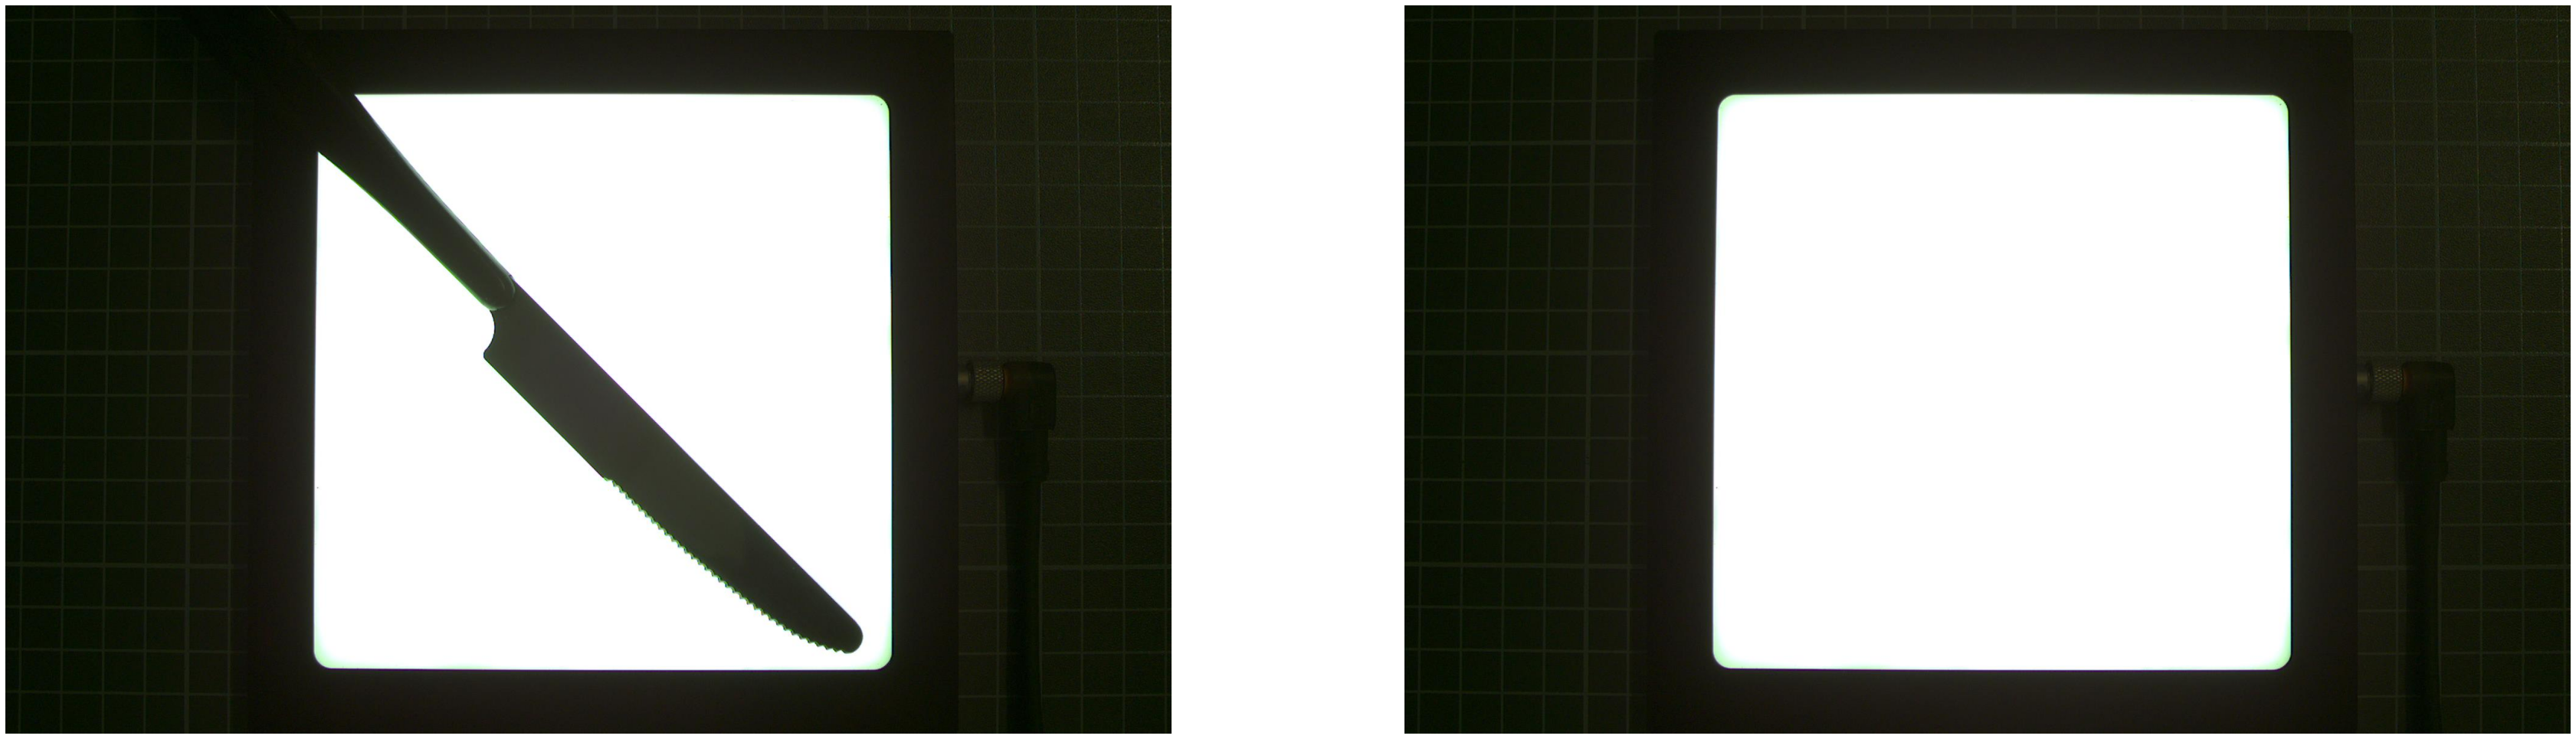

In [4]:
name = 'data/pic.jpg' ###
background_name = 'data/bgr.jpg' ###

image_orig = load_image(name)
background = load_image(background_name)

# image_orig = crop(image_orig, 550, 180, 1400, 1000)
# background = crop(background, 550, 180, 1400, 1000)

plot_images(image_orig, background)

#### 3) Segmentujte pozadí
S využitím jednoduchých funkcí vytvořte binární masku nasnímaného pozadí zadního nasvícení. Bude dále využita k segmentaci složitější scény.

In [5]:
def binary_mask_from_background(background_image):
    ###
    img = to_gray(background_image)
    mask = segmentation_one_threshold(img, 100)
    return mask

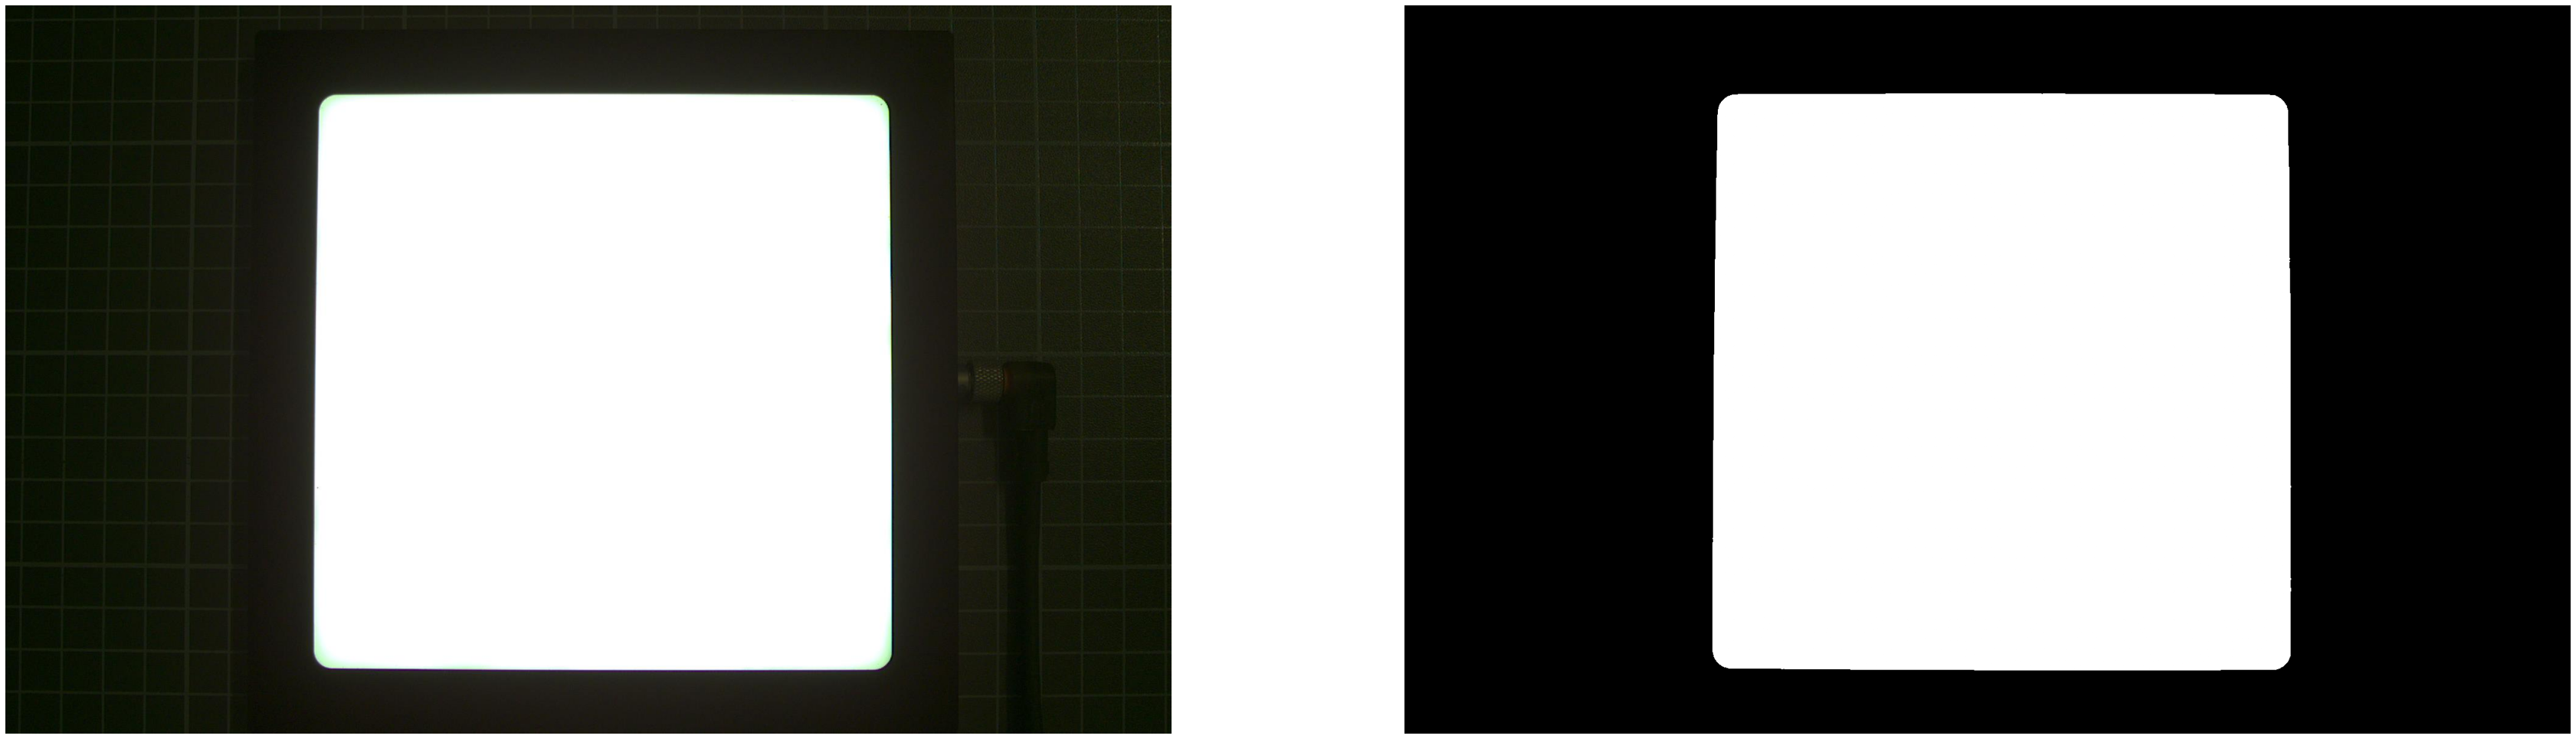

In [6]:
mask = binary_mask_from_background(background)
plot_images(background, mask)

#### 4) Segmentujte objekty
S využitím již známých a nově přidaných funkcí vytvořte algoritmus segmentace objektu z obrazu. Cílem je vytvořit takový algoritmus, který z obrazu vytvoří jeho konturu. Využijte stále zadního nasvícení a již segmentovaného pozadí z minulého úkolu.

In [14]:
def segment_object(image, background):
    ### algoritmus
    ...
    mask = binary_mask_from_background(background)
    img = segmentation_one_threshold(to_gray(image), 150)
    masked = negative(cv2.bitwise_and(img, mask))
    masked = crop_by_bounding_rect(masked)
    masked = cv2.bitwise_and(~img, mask)
    masked = filtration_median(masked, 3)
    image, _, contour = find_contours(masked, 1000, external=False)
    
    return image, contour

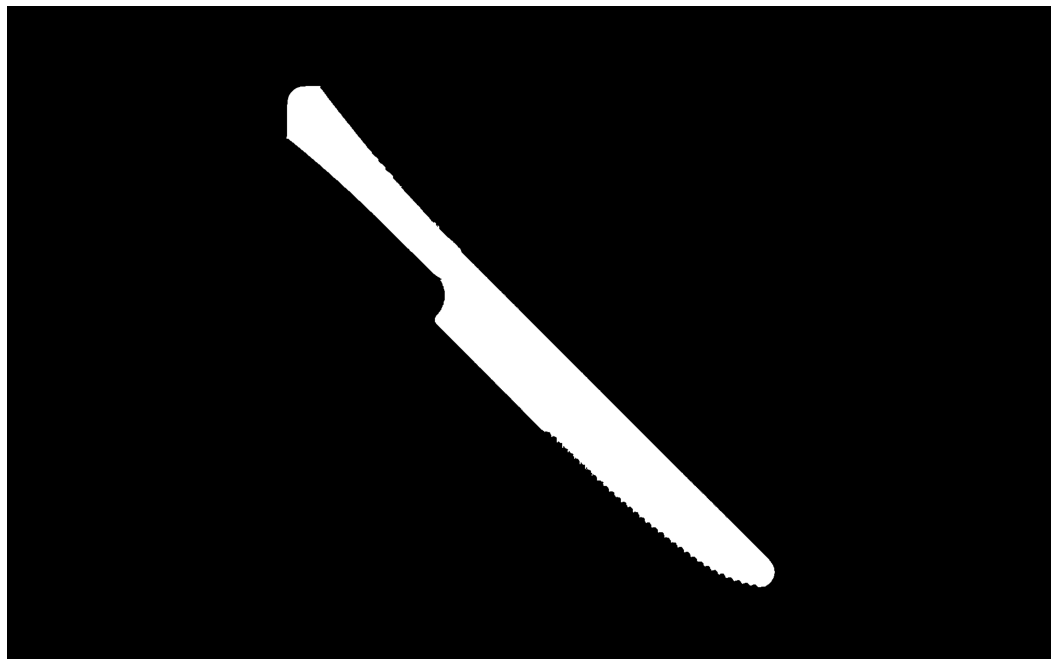

In [15]:
binary_object, contour = segment_object(image_orig, mask)
plot_images(binary_object)

#### 5) Spočtěte popisné charakteristiky
U vašeho vytvořeného segmentovaného ořízlého binárního objektu spočtěte popisné tvarové charakteristiky.

In [9]:
shape_descriptions = list()

### Postupně nebo automaticky
###
for (k, v), f in zip(db.items(), functions):
    shape_descriptions.append(f(contour[0]))
    
# Konverze do np.array formátu
shape_descriptions = np.array(shape_descriptions)

In [10]:
assert len(shape_descriptions) == 7, 'Nebylo použito správné množství funkcí'

#### 6) Zjistěte, o který objekt z databáze se jedná

Jedná se o objekt: knife (vzdálenost = 0.0896)


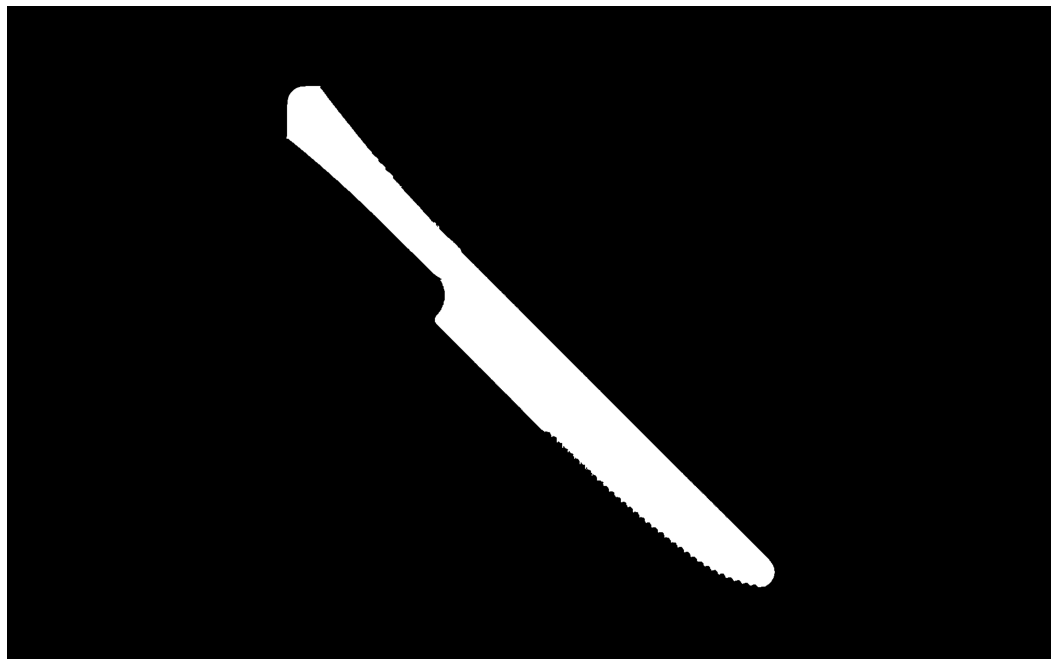

In [11]:
results = list()
for key in db:
    results.append(np.linalg.norm(db[key] - shape_descriptions))

result = min(results)
result_key = list(db.keys())[np.argmin(results)]

print(f'Jedná se o objekt: {result_key} (vzdálenost = {result:.4f})')
plot_images(binary_object)